## 调用igraph库函数生成任意度分布指数的无标度网络

In [13]:
import matplotlib.pyplot as plt
import igraph as ig

In [14]:
# 定义求度分布的函数(注意是针对igraph类型的图)
def get_pdf_igraph(G):
    all_k = G.degree()
    k = list(set(all_k))  # 获取所有可能的度值
    N = len(all_k)

    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.vs:
            if G.degree(i) == ki:
                c += 1
        Pk.append(c / N)

    return sorted(k), Pk

In [17]:
N = 100000
avk = 6.0
L = int(avk*N/2)
gamma = 2.1

G = ig.Graph.Static_Power_Law(N, L, gamma)
print(G.vcount(), G.ecount())

100000 300000


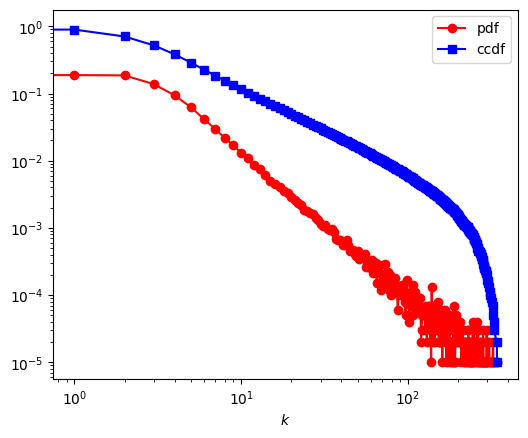

In [16]:
k, Pk = get_pdf_igraph(G)
Pck = np.array([sum(Pk[i:]) for i in range(len(Pk))])

plt.figure(figsize=(6, 4.8))
plt.plot(k, Pk, 'ro-', label="pdf")
plt.plot(k, Pck, 'bs-', label="ccdf")
plt.xlabel("$k$")
# plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc=0)

plt.show()